In [190]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import pathlib
from datetime import date,datetime,timedelta
from tqdm import tqdm

ROOT_PATH = pathlib.Path().resolve().parents[0]
plt.rcParams["font.family"] = "IPAGothic"

In [5]:
japan = gpd.read_file(ROOT_PATH/"shp/japank.shp")
df = pd.read_csv(ROOT_PATH/"csv/ans_use_msm_extract_anedas_point.csv")

In [4]:
df["time"] = pd.to_datetime(df["time"])
df = df.sort_values(by="time")
df_extract = df[df["time"] <= datetime(2022,1,1,0,0,0)]

In [5]:
df_extract

,time,lat,lon,psea,sp,u,v,temp,rh,r1h,dswrf,predict_ncld,correct_ncld,ncld_diff
320503,2022-01-01,42.900002,143.1875,100919.265946,100052.293209,1.749236,-0.782875,261.283466,58.736239,200.0,665.0,23.239721,6.543335,-16.696385
467050,2022-01-01,35.400002,132.8750,102795.871416,102077.063814,1.253823,-2.954129,277.907885,65.894496,200.0,665.0,51.261349,93.749998,42.488649
44089,2022-01-01,38.250000,140.8750,101578.440246,100664.219804,3.688074,-1.474006,271.047470,50.768350,200.0,665.0,16.534777,25.731668,9.196891
44068,2022-01-01,43.299999,145.5625,100603.669622,100426.605129,6.886850,-4.642202,264.937127,58.894496,200.0,665.0,24.297411,0.000002,-24.297409
230609,2022-01-01,30.700001,130.9375,102831.651232,102426.605092,2.513762,-5.877676,282.578194,69.800459,200.0,665.0,31.616492,18.896668,-12.719824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278576,2022-01-01,35.000000,135.6875,102645.871419,100639.449162,2.097859,-1.033639,273.859587,81.424312,200.0,665.0,40.481340,60.595000,20.113659
106701,2022-01-01,34.400002,131.3750,102886.238387,101477.063825,0.911315,-3.333333,277.970609,58.268349,200.0,665.0,38.618908,21.923335,-16.695574
67833,2022-01-01,35.700001,140.8125,101881.651250,101764.219784,9.730887,-5.082569,276.564551,43.330277,200.0,665.0,14.261851,0.000002,-14.261849
150918,2022-01-01,36.150002,137.2500,102614.220044,93926.605249,0.238532,-2.911315,267.563686,82.644495,200.0,665.0,32.765378,99.999998,67.234619


In [64]:
def color(ncld : int):
    cm = plt.colormaps["jet"]

    return cm(ncld / 100),int(ncld / 10)

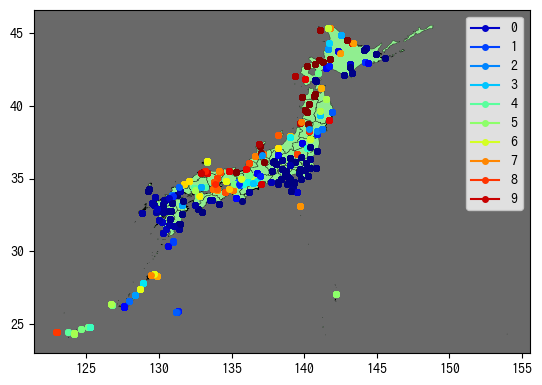

In [19]:
fig,ax = plt.subplots()
ax.set_facecolor("#696969")
japan.plot(ax=ax,color='#90ee90',edgecolor="black",linewidth=0.2)

for i in df_extract.iterrows():
    color_,label = color(i[1]["correct_ncld"])
    ax.plot(i[1]["lon"],i[1]["lat"],color=color_,marker="o",markersize=4,label=label)

handles,labels = plt.gca().get_legend_handles_labels()
unique_labels = sorted(list(set(labels)))
unique_handles = [handles[labels.index(label)] for label in unique_labels]

plt.legend(unique_handles,unique_labels)
    
plt.show()

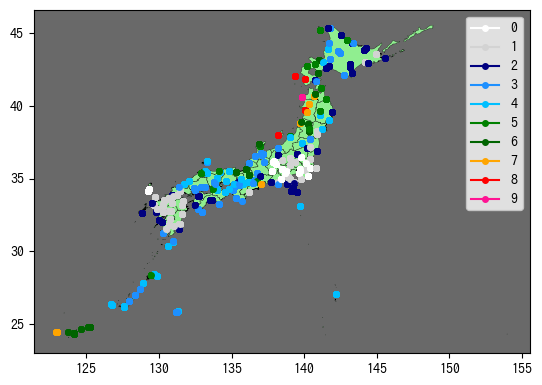

In [48]:
fig,ax = plt.subplots()
ax.set_facecolor("#696969")
japan.plot(ax=ax,color='#90ee90',edgecolor="black",linewidth=0.2)

for i in df_extract.iterrows():
    color_,label = color(i[1]["predict_ncld"])
    ax.plot(i[1]["lon"],i[1]["lat"],color=color_,marker="o",markersize=4,label=label)

handles,labels = plt.gca().get_legend_handles_labels()
unique_labels = sorted(list(set(labels)))
unique_handles = [handles[labels.index(label)] for label in unique_labels]

plt.legend(unique_handles,unique_labels)
    
plt.show()

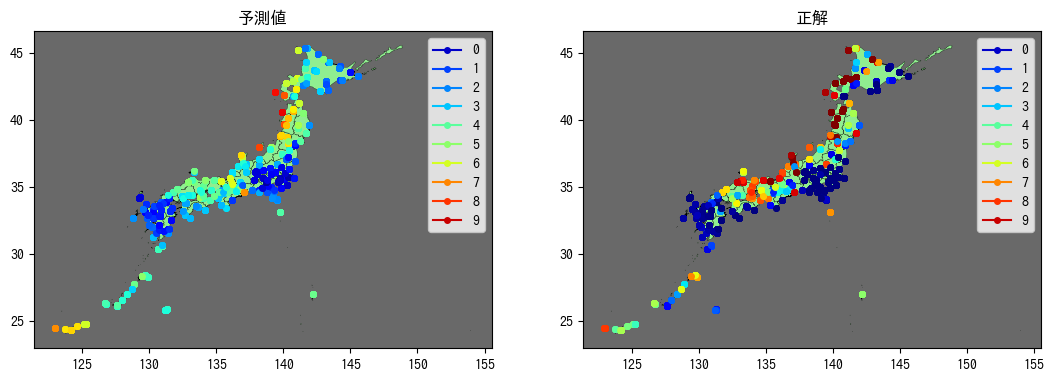

In [20]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(13,7))
ax[0].set_facecolor("#696969")
japan.plot(ax=ax[0],color='#90ee90',edgecolor="black",linewidth=0.2)

for i in df_extract.iterrows():
    color_,label = color(i[1]["predict_ncld"])
    ax[0].plot(i[1]["lon"],i[1]["lat"],color=color_,marker="o",markersize=4,label=label)

handles,labels = plt.gca().get_legend_handles_labels()
unique_labels = sorted(list(set(labels)))
unique_handles = [handles[labels.index(label)] for label in unique_labels]

ax[1].set_facecolor("#696969")
japan.plot(ax=ax[1],color='#90ee90',edgecolor="black",linewidth=0.2)

for i in df_extract.iterrows():
    color_,label = color(i[1]["correct_ncld"])
    ax[1].plot(i[1]["lon"],i[1]["lat"],color=color_,marker="o",markersize=4,label=label)

handles,labels = plt.gca().get_legend_handles_labels()
unique_labels = sorted(list(set(labels)))
unique_handles = [handles[labels.index(label)] for label in unique_labels]

ax[0].legend(unique_handles,unique_labels)
ax[1].legend(unique_handles,unique_labels)

plt.title("官所に絞った雲量予測とその結果")
ax[0].set_title("予測値")
ax[1].set_title("正解")

plt.savefig(ROOT_PATH/"png/予測結果.png",facecolor="white")
plt.show()

---

In [186]:
import pickle
import xarray as xr
with open(ROOT_PATH/"models/model_using_msm_extract_only_amedas_point.pkl", 'rb') as f:
    model = pickle.load(f)

amemaster = pd.read_csv(ROOT_PATH/"ame_master_20230323.csv")
amemaster_kan = amemaster[(amemaster["種類"] == "官")].drop_duplicates(subset="観測所番号")

In [188]:
df = xr.open_dataset(ROOT_PATH/"2023_0709.nc").to_dataframe().reset_index()

In [194]:
df_ = pd.DataFrame()
for _,i in amemaster_kan.iterrows():
    lon = i["経度(度)"] + i["経度(分)"] / 60
    lat = i["緯度(度)"] + i["緯度(分)"] / 60
    print(f"\r{lon},{lat}",end="")
    tmpdf = df[(round(df["lon"],2) == round(int(lon / 0.0625) * 0.0625, 2))
                &
                (round(df["lat"],2) == round(int(lat / 0.04999977) * 0.04999977,2))
                &
                (df["ref_time"].dt.hour == 0)
                &
                (df["time"].dt.hour == 0)
                ]
    # display(tmpdf)
    df_ = pd.concat([df_,tmpdf],axis=0)
    # break

124.245,24.3953333,24.336666666666666

In [195]:
#(2023/07/09 00:00)utcなのでobsと見比べるときは(2023/07/09 09:00)jstで見る必要がある

In [196]:
df_

,lon,lat,time,ref_time,psea,sp,u,v,temp,rh,r1h,ncld_upper,ncld_mid,ncld_low,ncld,dswrf
33556608,141.6250,45.400002,2023-07-09,2023-07-09,100388.532011,100189.907886,2.250765,6.134557,293.792686,90.041284,200.0,39.990000,7.080002,0.000002,39.990000,665.0
33750528,141.7500,45.400002,2023-07-09,2023-07-09,100380.733846,100214.678528,1.957187,3.779817,294.919101,84.261467,200.0,54.443333,5.713335,1.611669,54.443333,665.0
32781696,141.1250,45.200001,2023-07-09,2023-07-09,100401.834763,99527.522577,2.097859,6.886850,291.777684,98.479357,200.0,43.213334,10.156668,97.899998,98.486664,665.0
35012928,142.5625,44.900002,2023-07-09,2023-07-09,100383.486140,99414.678542,-0.978593,0.348624,297.323513,78.151376,200.0,76.758332,0.000002,0.000002,76.758332,665.0
34629504,142.3125,43.750000,2023-07-09,2023-07-09,100446.788891,98327.522599,-0.483180,-0.189602,298.661620,73.777523,200.0,21.093335,0.878336,0.000002,21.093335,665.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4646016,122.9375,24.450001,2023-07-09,2023-07-09,100944.036588,100877.063837,1.241590,9.902141,303.622027,78.823394,200.0,0.000002,0.000002,3.223335,3.223335,665.0
4742976,123.0000,24.450001,2023-07-09,2023-07-09,100947.706313,100839.449158,1.645260,9.070337,303.731793,78.963303,200.0,0.000002,0.000002,4.686669,4.686669,665.0
5906688,123.7500,24.400000,2023-07-09,2023-07-09,100978.898973,100614.678520,1.290520,7.700306,302.966040,79.433486,200.0,0.000002,0.000002,10.106668,10.106668,665.0
6488832,124.1250,24.299999,2023-07-09,2023-07-09,101031.192550,101014.678513,1.253823,9.327217,302.542655,79.963303,200.0,0.000002,0.000002,8.691669,8.691669,665.0


In [ ]:
def predict(model,df):
    return model.predict(df)

predict_msm = pd.DataFrame()

for i in df_.iterrows():
    ans = predict(model,i[1].drop(["lon","lat","time","ref_time","ncld_low","ncld_upper","ncld_mid","ncld"]).astype(float))[0]
    # display(i[1].drop(["lon","lat","time","ref_time","ncld_low","ncld_upper","ncld_mid","ncld"]).astype(float))
    tmpdf = i[1].copy()
    tmpdf["predict_ncld"] = ans
    predict_msm = pd.concat([predict_msm,tmpdf],axis=1)
    # break

In [206]:
predict_msm = predict_msm.T.copy()

In [207]:
predict_msm

,lon,lat,time,ref_time,psea,sp,u,v,temp,rh,r1h,ncld_upper,ncld_mid,ncld_low,ncld,dswrf,predict_ncld
33556608,141.625,45.400002,2022-12-01,2022-12-01,101276.605389,101061.467503,13.363915,2.256881,267.482668,79.944954,200.0,0.000002,61.328333,93.603331,93.603331,665.0,83.313126
33750528,141.75,45.400002,2022-12-01,2022-12-01,101270.642087,101073.394108,10.856269,2.373089,267.278816,78.224771,200.0,0.000002,69.873332,93.896665,93.896665,665.0,75.763893
32781696,141.125,45.200001,2022-12-01,2022-12-01,101361.926489,100386.238157,14.012233,2.458716,266.839749,86.47477,200.0,0.000002,63.671666,99.658331,99.658331,665.0,90.732903
35012928,142.5625,44.900002,2022-12-01,2022-12-01,101296.33016,100198.164766,3.975535,1.480122,266.215125,78.412844,200.0,0.000002,55.713333,99.999998,99.999998,665.0,61.957626
34629504,142.3125,43.75,2022-12-01,2022-12-01,101626.605383,99211.008821,2.0,0.385321,266.371934,83.75688,200.0,0.000002,79.491665,99.999998,99.999998,665.0,53.328272
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4646016,122.9375,24.450001,2022-12-01,2022-12-01,102172.018217,102098.164731,-7.626912,-9.100918,295.747577,78.318807,200.0,7.715002,97.363331,84.081665,97.363331,665.0,95.041244
4742976,123.0,24.450001,2022-12-01,2022-12-01,102165.137483,102048.623448,-7.345566,-8.782875,295.449639,79.383027,200.0,5.810002,97.606665,84.716665,97.606665,665.0,93.655041
5906688,123.75,24.4,2022-12-01,2022-12-01,102092.201705,101711.008775,-7.119266,-8.501529,296.027221,79.756881,200.0,0.146669,86.034998,71.631666,86.034998,665.0,93.76965
6488832,124.125,24.299999,2022-12-01,2022-12-01,102067.431063,102048.623448,-5.975535,-9.015291,296.246754,80.568807,200.0,0.000002,91.454998,72.118332,91.454998,665.0,91.395281


In [208]:
lon = 139 + 45 / 60
lat = 35 + 41.5 / 60

predict_msm[(round(predict_msm["lon"],2) == round(int(lon / 0.0625) * 0.0625, 2))
            &
            (round(predict_msm["lat"],2) == round(int(lat / 0.04999977) * 0.04999977,2))
            ]

TypeError: loop of ufunc does not support argument 0 of type float which has no callable rint method

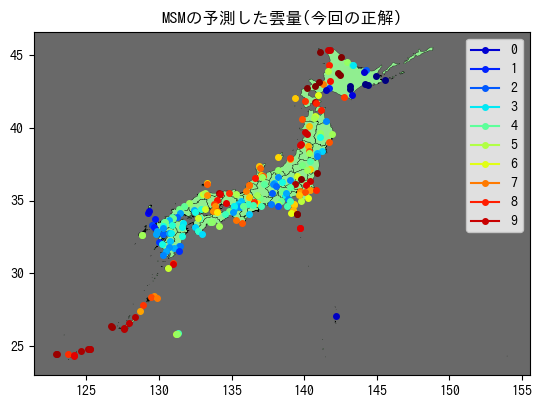

In [115]:
# MSMが予測した今回の正解

fig,ax = plt.subplots()
ax.set_facecolor("#696969")
japan.plot(ax=ax,color='#90ee90',edgecolor="black",linewidth=0.2)

for i in predict_msm.T.iterrows():
    color_,label = color(i[1]["ncld"])
    ax.plot(i[1]["lon"],i[1]["lat"],color=color_,marker="o",markersize=4,label=label)

handles,labels = plt.gca().get_legend_handles_labels()
unique_labels = sorted(list(set(labels)))
unique_handles = [handles[labels.index(label)] for label in unique_labels]

plt.title("MSMの予測した雲量(今回の正解)")
plt.legend(unique_handles,unique_labels)
plt.savefig(ROOT_PATH/"png/2022-12-01のMSMが予測した雲量.png")
    
plt.show()

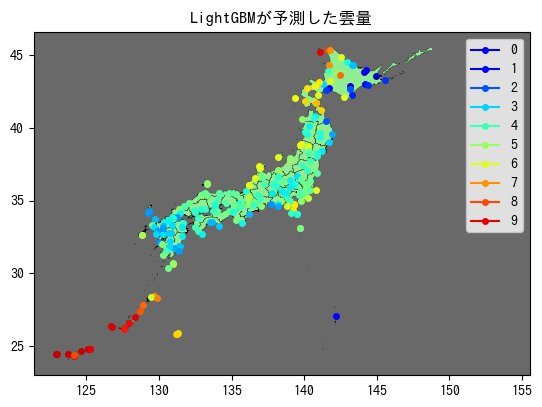

In [153]:
# MSMの値に対して予測した雲量

fig,ax = plt.subplots()
ax.set_facecolor("#696969")
japan.plot(ax=ax,color='#90ee90',edgecolor="black",linewidth=0.2)

for i in predict_msm.T.iterrows():
    color_,label = color(i[1]["predict_ncld"])
    ax.plot(i[1]["lon"],i[1]["lat"],color=color_,marker="o",markersize=4,label=label)

handles,labels = plt.gca().get_legend_handles_labels()
unique_labels = sorted(list(set(labels)))
unique_handles = [handles[labels.index(label)] for label in unique_labels]

plt.title("LightGBMが予測した雲量")
plt.legend(unique_handles,unique_labels)
plt.savefig(ROOT_PATH/"png/2022-12-01のLightGBMが予測した雲量.png")
    
plt.show()

In [135]:
obs = []

ddd = pd.read_csv(ROOT_PATH/"csv/obs_value/2022/12/01/20221201_11016.csv")

In [127]:
import glob

files = glob.glob(str(ROOT_PATH/"csv/obs_value/2022/12/01/*.csv"))

In [155]:
a = pd.read_csv(ROOT_PATH/"csv/obs_value/2022/12/01//20221201_11016.csv")

In [180]:
asa = pd.DataFrame()
for file in files:
    tmp = pd.read_csv(file)
    try:
        asa = pd.concat([asa,tmp.loc[:,"雲量"]],axis=1)
    except:
        continue

In [185]:
asa

,雲量,雲量,雲量,雲量,雲量,雲量,雲量,雲量,雲量,雲量,...,雲量,雲量,雲量,雲量,雲量,雲量,雲量,雲量,雲量,雲量
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,...,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,...,NaN,NaN,NaN,NaN,10-,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [176]:
obs

0      nan
1      nan
2      nan
3      nan
4      nan
      ... 
122    nan
123    nan
124    nan
125    nan
126    nan
Length: 127, dtype: object